In [1]:
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
from numpy import arange,meshgrid,sqrt

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import glob
import csv
import gsw
import warnings

%matplotlib inline

In [2]:
# Read in the file

f = xr.open_mfdataset('bsose_i133_2013to2018_5day_pH.nc');
f.keys #print what is in the file to get a old on it

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


<bound method Mapping.keys of <xarray.Dataset>
Dimensions:  (XC: 2160, YC: 588, Z: 52, time: 438)
Coordinates:
    iter     (time) int64 dask.array<chunksize=(438,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2013-01-05 2013-01-10 ... 2018-12-30
  * XC       (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * YC       (YC) float32 -77.98265 -77.9479 -77.91305 ... -29.870987 -29.715317
  * Z        (Z) float32 -2.1 -6.7 -12.15 -18.55 ... -5000.0 -5400.0 -5800.0
    Depth    (YC, XC) float32 dask.array<chunksize=(588, 2160), meta=np.ndarray>
    rA       (YC, XC) float32 dask.array<chunksize=(588, 2160), meta=np.ndarray>
    drF      (Z) float32 dask.array<chunksize=(52,), meta=np.ndarray>
    hFacC    (Z, YC, XC) float32 dask.array<chunksize=(52, 588, 2160), meta=np.ndarray>
Data variables:
    BLGPH3D  (time, Z, YC, XC) float32 dask.array<chunksize=(438, 52, 588, 2160), meta=np.ndarray>>

In [90]:
Lon = f.variables['XC'].values;
Lat = f.variables['YC'].values;

pH = f.variables['BLGPH3D'][1,10,:,:].values;

pH[pH==0.0]=np.nan

In [91]:
np.nanmin(pH)

7.385699

In [6]:
Lon[5]-Lon[4]

0.16666669

In [7]:
Lon[4]-Lon[3]

0.16666663

## Basic Plot

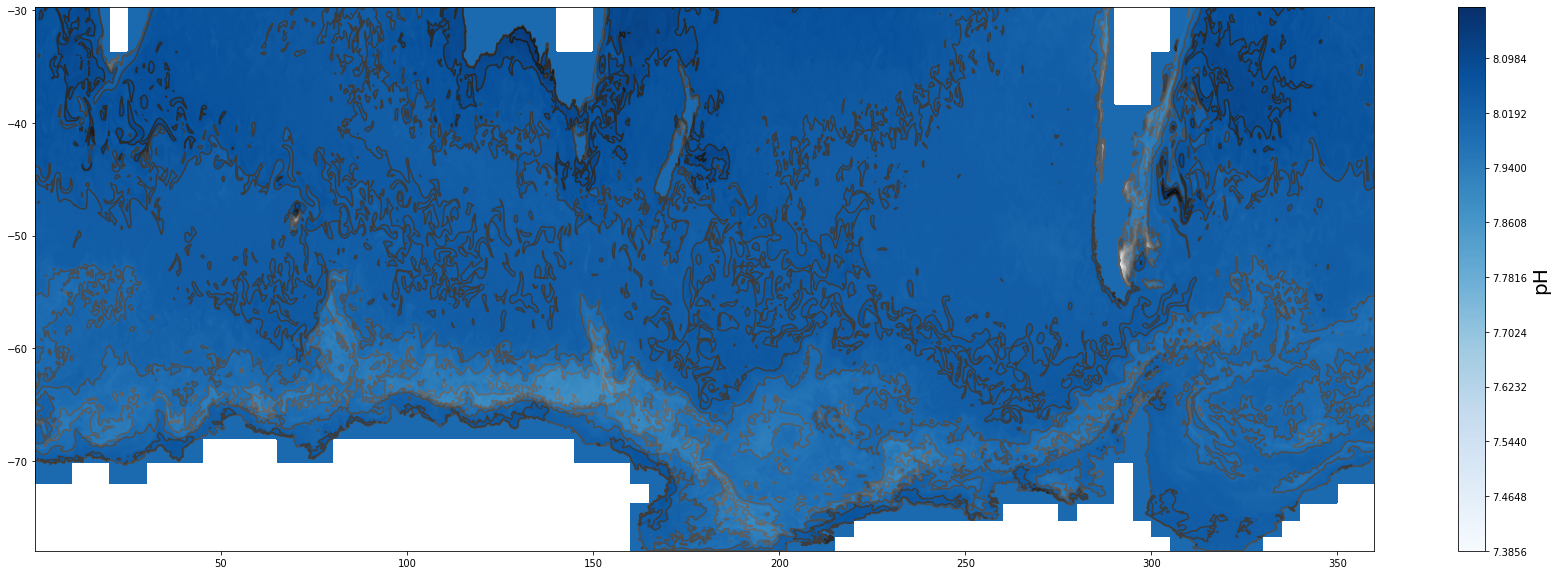

In [103]:
plt.figure(1,(30,10))



#ax = plt.axes(projection=ccrs.Mollweide())
#ax.coastlines()

#min_, max_ = 4,9

im=plt.contourf(Lon,Lat,pH,1000,cmap='Blues')
plt.contour(Lon,Lat,pH,20,cmap='Greys')
#plt.clim(min_, max_)

plt.colorbar(im).set_label('pH',rotation=90,fontsize=20)

## Yearly Averages

In [107]:
Lon = f.variables['XC'].values;
Lat = f.variables['YC'].values;

pH = f.variables['BLGPH3D'][1,0:72,:,:].values;

In [110]:
pH_Av=[];

for i in range(len(Lon)):
    for j in range(len(Lat)):
        pH_Avy = np.nanmean(pH[j,i]);
        pH_Av.append(pH_Avy)

IndexError: index 52 is out of bounds for axis 0 with size 52